## Imports

In [1]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt


# region imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
import lightgbm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from src.features.impute_columns import (impute_categorical_columns,impute_numeric_columns)
from src.contracts.Dataset import Dataset
from src.features.standardize import standardize
from src.features.label_encoder import MultiColumnLabelEncoder
from src.features.preprocess import preprocess_


/Users/onurerkinsucu/opt/anaconda3/envs/mckinsey_env/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [50]:
len(train)

3865

## Read the Data

In [2]:
train = pd.read_csv('/Users/onurerkinsucu/Dev/prohack/data/processed/train_column_names_fixed.csv')
X_test = pd.read_csv('/Users/onurerkinsucu/Dev/prohack/data/processed/test_column_names_fixed.csv')


In [3]:
ds = preprocess_(standardize_or_not=True,impute_or_not=True)


Imputing Training Set


/Users/onurerkinsucu/opt/anaconda3/envs/mckinsey_env/lib/python3.7/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Imputing Val Set
Imputing Test Set


In [4]:
ds.X_train['is_train'] = 1 
ds.X_val['is_train'] = 1 
ds.X_test['is_train'] = 0




full_ds = ds.X_train.append(ds.X_val).reset_index(drop=True).append(ds.X_test).reset_index(drop=True)

full_ds =full_ds.join(full_ds.groupby('galaxy')['gender_inequality_index_gii'].mean(), on='galaxy', rsuffix='_galaxy_mean')
full_ds =full_ds.join(full_ds.groupby('galaxy')['intergalactic_development_index_idi_male_rank'].mean(), on='galaxy', rsuffix='_galaxy_mean')
full_ds =full_ds.join(full_ds.groupby('galaxy')['intergalactic_development_index_idi_rank'].mean(), on='galaxy', rsuffix='_galaxy_mean')
full_ds =full_ds.join(full_ds.groupby('galaxy')['intergalactic_development_index_idi_female_rank'].mean(), on='galaxy', rsuffix='_galaxy_mean')
full_ds =full_ds.join(full_ds.groupby('galaxy')['old_age_dependency_ratio_old_age_65_and_older_per_100_creatures_ages_15-64'].mean(), on='galaxy', rsuffix='_galaxy_mean')



X_train = full_ds[full_ds['is_train']==1]
X_test = full_ds[full_ds['is_train']==0]
y_train = ds.y_train.append(ds.y_val).reset_index(drop=True)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

ds.X_train = X_train
ds.y_train = y_train
ds.X_val = X_val
ds.y_val = y_val
ds.X_test = X_test


## Plots

In [58]:
matrix = pps.matrix(train_sample)

In [73]:
pps.score(train, 'Gross income per capita', "y")

{'x': 'Gross income per capita',
 'y': 'y',
 'task': 'regression',
 'ppscore': 0.022392461395078,
 'metric': 'mean absolute error',
 'baseline_score': 0.03634705288460161,
 'model_score': 0.03553315290605831,
 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')}

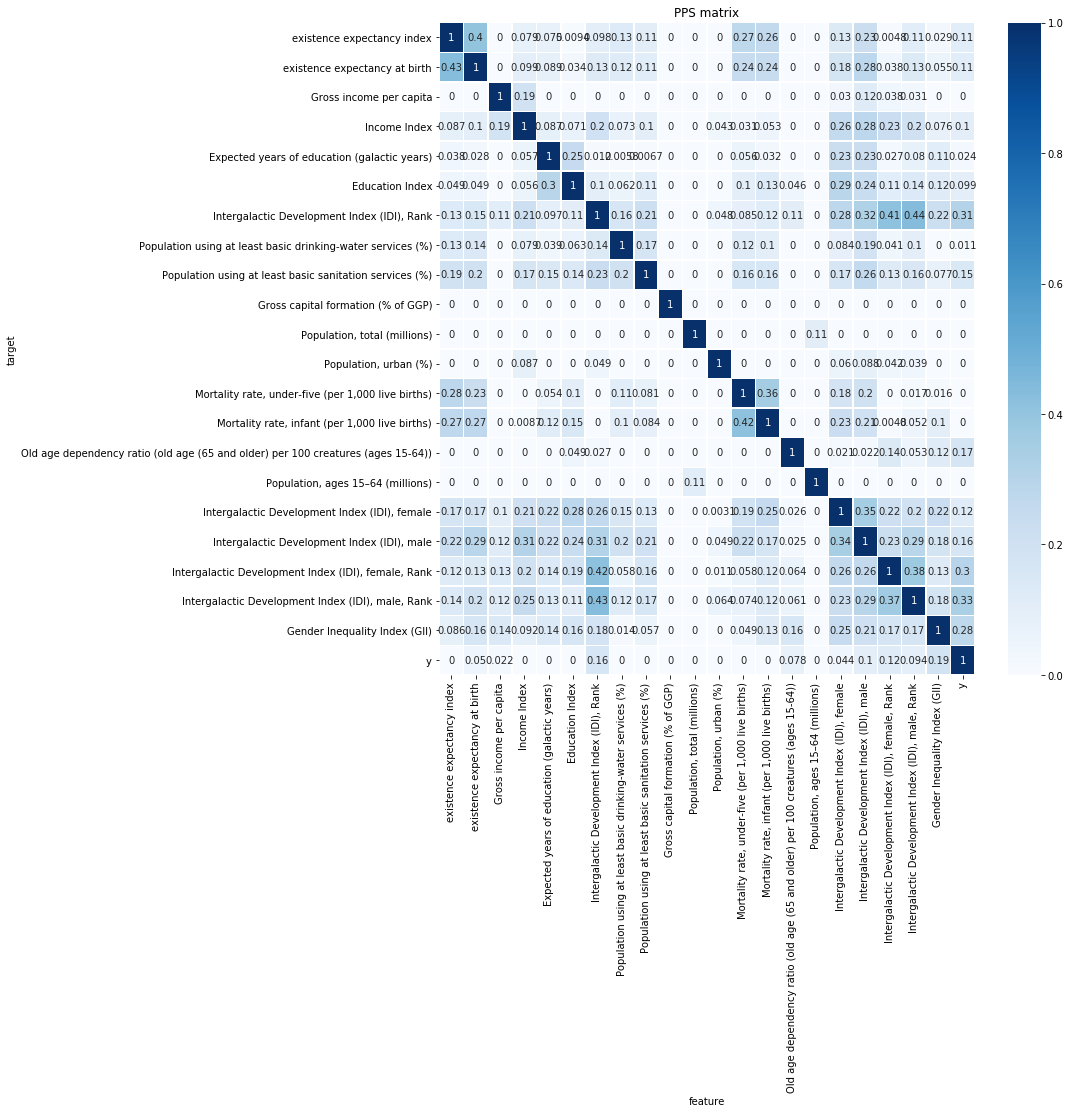

In [59]:
heatmap(matrix)


In [89]:
train.columns[train.isna().sum() / len(train) > 0.5]

Index(['gross_capital_formation_percentage_of_ggp',
       'population_total_millions', 'population_urban_percentage',
       'mortality_rate_under_five_per_1000_live_births',
       'mortality_rate_infant_per_1000_live_births',
       'old_age_dependency_ratio_old_age_65_and_older_per_100_creatures_ages_15_64',
       'population_ages_15–64_millions',
       'population_ages_65_and_older_millions',
       'life_expectancy_at_birth_male_galactic_years',
       'life_expectancy_at_birth_female_galactic_years',
       'population_under_age_5_millions',
       'young_age_0_14_dependency_ratio_per_100_creatures_ages_15_64',
       'adolescent_birth_rate_births_per_1000_female_creatures_ages_15_19',
       'total_unemployment_rate_female_to_male_ratio',
       'vulnerable_employment_percentage_of_total_employment',
       'unemployment_total_percentage_of_labour_force',
       'employment_in_agriculture_percentage_of_total_employment',
       'labour_force_participation_rate_percentage_ages

In [6]:
X_train['y'] = y_train

In [14]:
feature_importance = []
for feature in list(X_train.columns):
    feature_importance.append((pps.score(X_train, feature, "y")['x'], pps.score(X_train, feature, "y")['ppscore']))
    print(pps.score(X_train, feature, "y")['ppscore'])
#     print(pps.score(train, feature, "y")['x'] + ': .{}' .format(pps.score(train, feature, "y")['ppscore']))

0
0.7981329594882319
0
0.018219621009126996
0.04208765319989349
0
0
0
0.08178336512532569
0
0.14985894575190017
0
0
0
0
0
0.006539129255324072
0
0.09694962747271463
0
0
0.07329113147568711
0.06213958045907819
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.04064889049773279
0
0
0
0
0
0
0.026475410592636472
0.026456951180911847
0.05860324117773463
0
0
0.09477505423010946
0
0
0.048824057287076505
0
0
0
0
0
0
0
0
0
0.030109889690391856
0
0.10641327584898219
0.1208368780878788
0
0.08514295976362662
0.17297041987623818
0
0
0
0.13159038670184586
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.7980614757057601
0.7980390122301795
0.7980493953734366
0.7980180100607203
0.7980390122301795
1


In [16]:
sel_feature = sorted(feature_importance, key=lambda x: x[1], reverse=True)
sel_feature

[('y', 1),
 ('galaxy', 0.7981329594882319),
 ('gender_inequality_index_gii_galaxy_mean', 0.7980614757057601),
 ('intergalactic_development_index_idi_rank_galaxy_mean', 0.7980493953734366),
 ('intergalactic_development_index_idi_male_rank_galaxy_mean',
  0.7980390122301795),
 ('old_age_dependency_ratio_old_age_65_and_older_per_100_creatures_ages_15-64_galaxy_mean',
  0.7980390122301795),
 ('intergalactic_development_index_idi_female_rank_galaxy_mean',
  0.7980180100607203),
 ('intergalactic_development_index_idi_male_rank', 0.17297041987623818),
 ('intergalactic_development_index_idi_rank', 0.14985894575190017),
 ('gender_inequality_index_gii', 0.13159038670184586),
 ('intergalactic_development_index_idi_male', 0.1208368780878788),
 ('intergalactic_development_index_idi_female', 0.10641327584898219),
 ('old_age_dependency_ratio_old_age_65_and_older_per_100_creatures_ages_15-64',
  0.09694962747271463),
 ('estimated_gross_galactic_income_per_capita_male', 0.09477505423010946),
 ('interga

In [18]:
important_features = []
for tuples in sel_feature:
    important_features.append(tuples[0])


In [25]:
features_to_plot = important_features[:20]

In [27]:
features_to_plot

['y',
 'galaxy',
 'gender_inequality_index_gii_galaxy_mean',
 'intergalactic_development_index_idi_rank_galaxy_mean',
 'intergalactic_development_index_idi_male_rank_galaxy_mean',
 'old_age_dependency_ratio_old_age_65_and_older_per_100_creatures_ages_15-64_galaxy_mean',
 'intergalactic_development_index_idi_female_rank_galaxy_mean',
 'intergalactic_development_index_idi_male_rank',
 'intergalactic_development_index_idi_rank',
 'gender_inequality_index_gii',
 'intergalactic_development_index_idi_male',
 'intergalactic_development_index_idi_female',
 'old_age_dependency_ratio_old_age_65_and_older_per_100_creatures_ages_15-64',
 'estimated_gross_galactic_income_per_capita_male',
 'intergalactic_development_index_idi_female_rank',
 'intergalactic_development_index_idi',
 'life_expectancy_at_birth_male_galactic_years',
 'life_expectancy_at_birth_female_galactic_years',
 'expected_years_of_education_male_galactic_years',
 'domestic_credit_provided_by_financial_sector_percentage_of_ggp']

/Users/onurerkinsucu/opt/anaconda3/envs/mckinsey_env/lib/python3.7/site-packages/seaborn/axisgrid.py:1342: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


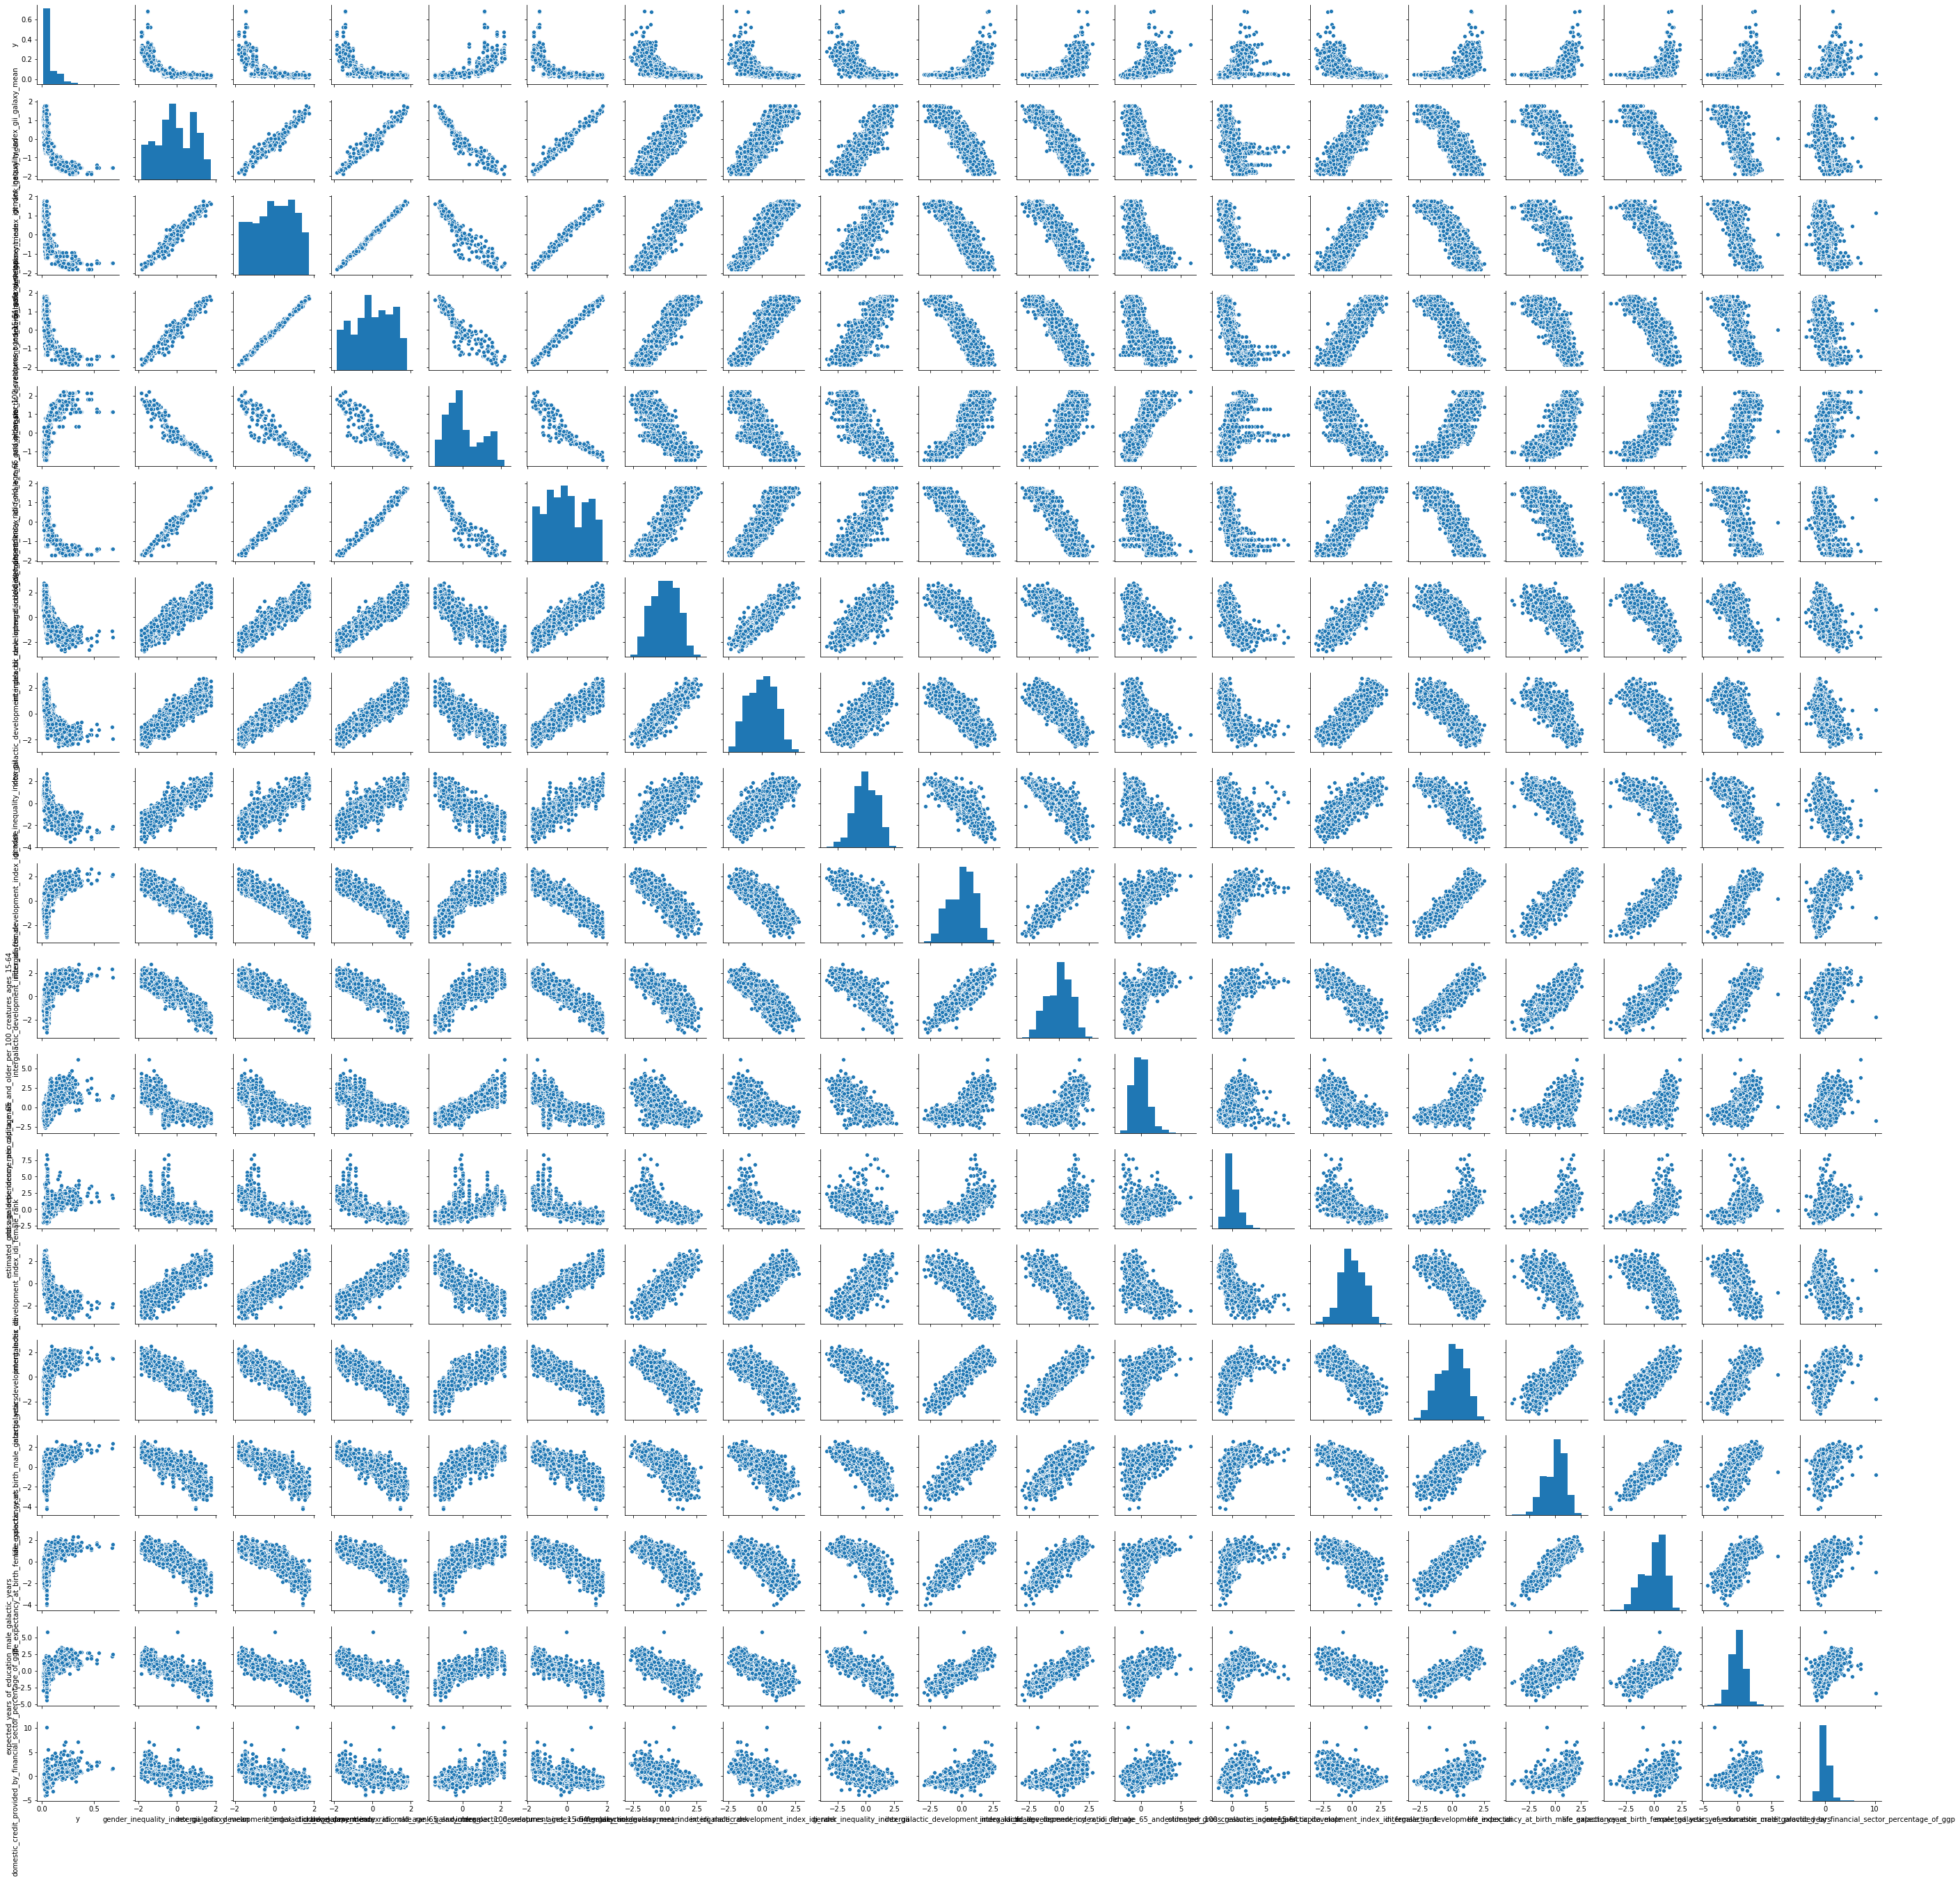

In [26]:
sns.pairplot(X_train[features_to_plot])


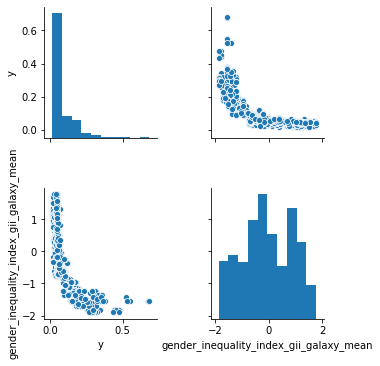

In [29]:
sns.pairplot(X_train[['y','gender_inequality_index_gii_galaxy_mean']])


In [47]:
trial = X_train[['y','gender_inequality_index_gii_galaxy_mean']]

In [48]:
trial['gender_inequality_index_gii_galaxy_mean'] = np.log(trial['gender_inequality_index_gii_galaxy_mean']+2)

/Users/onurerkinsucu/opt/anaconda3/envs/mckinsey_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


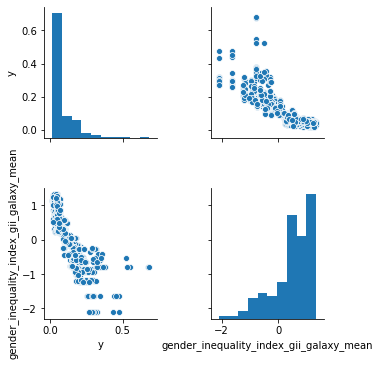

In [49]:
sns.pairplot(trial[['y','gender_inequality_index_gii_galaxy_mean']])
